# Project Notebook

### Imports

In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, Add, Input
from keras.models import Model
from tensorflow.nn import depth_to_space
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image
import math
from scipy.signal import convolve2d

In [2]:
from load_data import loadDataR09, loadDataR27
from utils import *
from SRCNN import getModel, compileModel, trainModel
from DIPCI import compile, train

### LOAD DATA

In [3]:
upscale_factor = 4

In [4]:
ssh_R09, sst_R09, ssh_R09_norm, sst_norm, ssh_lr, sst_lr = loadDataR09( upscale_factor )

### SRCNN 

In [5]:
srcnn, callbacks, epochs, checkpoint_filepath = compileModel()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 1)]   0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 64)    1664      
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    36928     
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 32)    18464     
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 16)    4624      
                                                                 
 tf.nn.depth_to_space (TFOpL  (None, None, None, 1)    0         
 ambda)                                                          
                                                             

2022-05-18 15:56:08.664068: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-18 15:56:08.664092: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-18 15:56:08.664108: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (3800411-Latitude-E7270): /proc/driver/nvidia/version does not exist
2022-05-18 15:56:08.664265: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Might skip training and load checkpoints below

Epoch 1/100
46/46 [==============================] - 3s 48ms/step - loss: 0.0401 - mse: 0.0401 - PSNR: 17.5637 - val_loss: 0.0043 - val_mse: 0.0043 - val_PSNR: 23.7385
Epoch 2/100
46/46 [==============================] - 2s 45ms/step - loss: 0.0028 - mse: 0.0028 - PSNR: 25.7126 - val_loss: 0.0015 - val_mse: 0.0015 - val_PSNR: 28.4032
Epoch 3/100
46/46 [==============================] - 2s 45ms/step - loss: 0.0013 - mse: 0.0013 - PSNR: 29.1068 - val_loss: 7.9489e-04 - val_mse: 7.9489e-04 - val_PSNR: 31.0331
Epoch 4/100
46/46 [==============================] - 2s 46ms/step - loss: 8.6447e-04 - mse: 8.6447e-04 - PSNR: 30.8256 - val_loss: 6.0648e-04 - val_mse: 6.0648e-04 - val_PSNR: 32.2125
Epoch 5/100
46/46 [==============================] - 2s 45ms/step - loss: 5.8063e-04 - mse: 5.8063e-04 - PSNR: 32.4217 - val_loss: 4.4140e-04 - val_mse: 4.4140e-04 - val_PSNR: 33.5919
Epoch 6/100
46/46 [==============================] - 2s 47ms/step - loss: 7.2405e-04 - mse: 7.2405e-04 - PSNR: 32.0602 -

46/46 [==============================] - 2s 48ms/step - loss: 9.6908e-05 - mse: 9.6908e-05 - PSNR: 40.3727 - val_loss: 8.7972e-05 - val_mse: 8.7972e-05 - val_PSNR: 40.6281
Epoch 90/100
46/46 [==============================] - 2s 47ms/step - loss: 4.2541e-04 - mse: 4.2541e-04 - PSNR: 36.7633 - val_loss: 1.3091e-04 - val_mse: 1.3091e-04 - val_PSNR: 38.8770
Epoch 91/100
46/46 [==============================] - 2s 47ms/step - loss: 1.1078e-04 - mse: 1.1078e-04 - PSNR: 39.6649 - val_loss: 8.0991e-05 - val_mse: 8.0991e-05 - val_PSNR: 41.0026
Epoch 92/100
46/46 [==============================] - 2s 47ms/step - loss: 8.9781e-05 - mse: 8.9781e-05 - PSNR: 40.5801 - val_loss: 7.8549e-05 - val_mse: 7.8549e-05 - val_PSNR: 41.1373
Epoch 93/100
46/46 [==============================] - 2s 48ms/step - loss: 8.6260e-05 - mse: 8.6260e-05 - PSNR: 40.7604 - val_loss: 7.7181e-05 - val_mse: 7.7181e-05 - val_PSNR: 41.2141
Epoch 94/100
46/46 [==============================] - 2s 47ms/step - loss: 8.5082e-05 - 

2022-05-18 15:49:03.368567: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: tmp/model/srcnn/assets


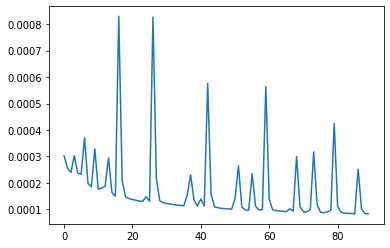

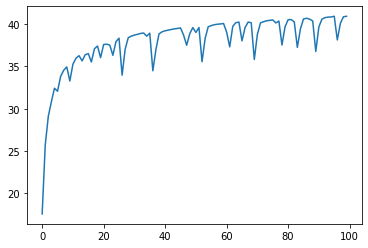

In [6]:
batch_size = 16
trainModel( srcnn, batch_size, ssh_lr, ssh_norm, callbacks, epochs )

#### Results

In [6]:
srcnn.load_weights(checkpoint_filepath)

Average bicubic PSNR :  31.22162328908182
Average bicubic RMSE :  0.027497676010918647
Average SRCNN PSNR :  35.13331339629658
Average SRCNN RMSE :  0.017552120711293178


<Figure size 432x288 with 0 Axes>

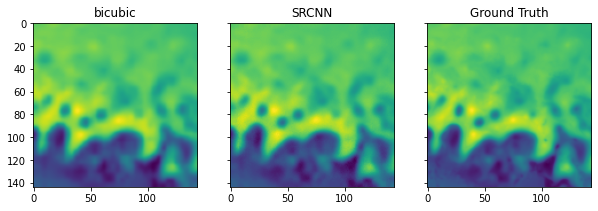

PSNR of Bicubic and Ground Truth image is  29.717047440053015
PSNR of SRCNN and Ground Truth is  31.519263760829375


<Figure size 432x288 with 0 Axes>

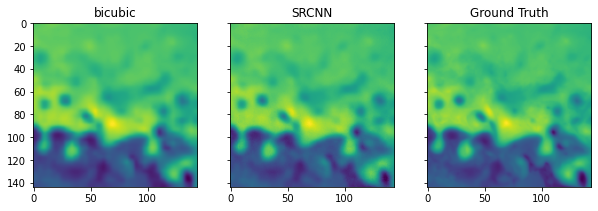

PSNR of Bicubic and Ground Truth image is  30.02485320715275
PSNR of SRCNN and Ground Truth is  34.094520979701244


<Figure size 432x288 with 0 Axes>

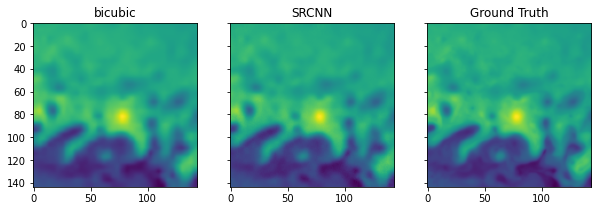

PSNR of Bicubic and Ground Truth image is  34.35547229825576
PSNR of SRCNN and Ground Truth is  37.346123173488905


<Figure size 432x288 with 0 Axes>

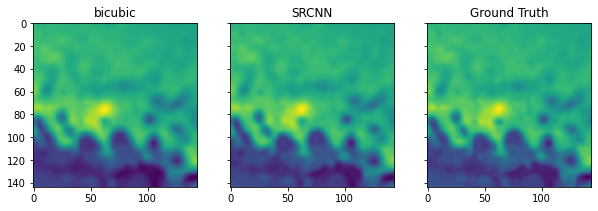

PSNR of Bicubic and Ground Truth image is  27.735050343765373
PSNR of SRCNN and Ground Truth is  33.343673613340535


<Figure size 432x288 with 0 Axes>

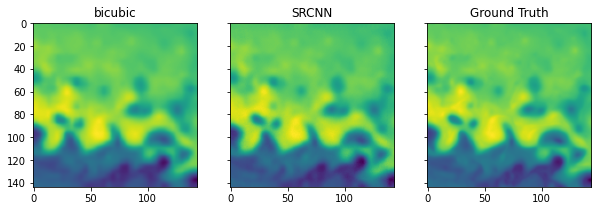

PSNR of Bicubic and Ground Truth image is  30.29110212510758
PSNR of SRCNN and Ground Truth is  29.08313886291305


In [7]:
test_srcnn(srcnn, ssh_lr[366:], ssh[366:])

### DIPCI

In [5]:
dipci, callbacks, epochs, checkpoint_filepath = compile()

2022-05-18 16:03:44.295947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-18 16:03:44.295976: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-18 16:03:44.295997: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (3800411-Latitude-E7270): /proc/driver/nvidia/version does not exist
2022-05-18 16:03:44.296197: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 lr_input (InputLayer)          [(None, None, None,  0           []                               
                                 1)]                                                              
                                                                                                  
 hr_input (InputLayer)          [(None, None, None,  0           []                               
                                 1)]                                                              
                                                                                                  
 model_2 (Functional)           (None, None, None,   1665        ['lr_input[0][0]',               
                                1)                                'add[0][0]']              

### Training (to skip)

Epoch 1/100
23/23 [==============================] - 336s 15s/step - loss: 0.0783 - mse: 0.0783 - PSNR: 13.6558
Epoch 2/100
23/23 [==============================] - 316s 14s/step - loss: 0.0116 - mse: 0.0116 - PSNR: 19.4439
Epoch 3/100
23/23 [==============================] - 313s 14s/step - loss: 0.0062 - mse: 0.0062 - PSNR: 22.1703
Epoch 4/100
23/23 [==============================] - 318s 14s/step - loss: 0.0052 - mse: 0.0052 - PSNR: 22.9931
Epoch 5/100
23/23 [==============================] - 326s 14s/step - loss: 0.0036 - mse: 0.0036 - PSNR: 24.4653
Epoch 6/100
23/23 [==============================] - 315s 14s/step - loss: 0.0025 - mse: 0.0025 - PSNR: 26.0149
Epoch 7/100
23/23 [==============================] - 313s 14s/step - loss: 0.0030 - mse: 0.0030 - PSNR: 25.7644
Epoch 8/100
23/23 [==============================] - 314s 14s/step - loss: 0.0020 - mse: 0.0020 - PSNR: 27.1274
Epoch 9/100
23/23 [==============================] - 314s 14s/step - loss: 0.0014 - mse: 0.0014 - PSNR: 

2022-05-19 01:03:26.191940: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: tmp/model/dipci/assets


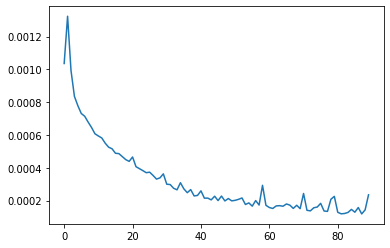

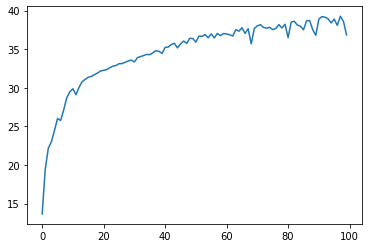

In [6]:
dipci = train(dipci, ssh_lr, sst_lr, ssh_norm, callbacks, epochs)

### Results

In [ ]:
#dipci.load_weights(checkpoint_filepath)

Average bicubic PSNR :  31.942320625300418
Average bicubic RMSE :  0.027438150823157176
Average DIPCI PSNR :  32.092788525055774
Average DIPCI RMSE :  0.02744051355297806


<Figure size 432x288 with 0 Axes>

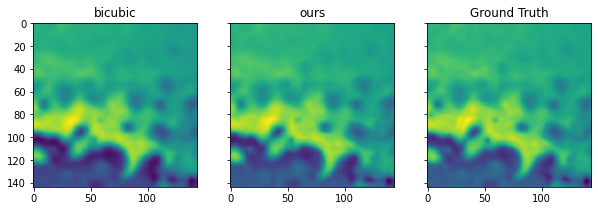

PSNR of Bicubic and Ground Truth image is  24.0005222861492
PSNR of DIPCI and Ground Truth is  33.6626625308545


<Figure size 432x288 with 0 Axes>

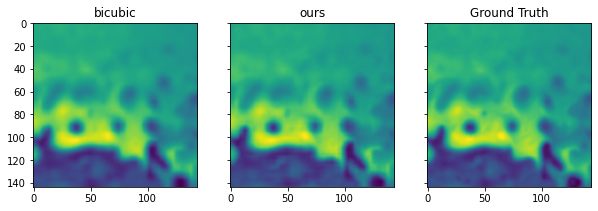

PSNR of Bicubic and Ground Truth image is  35.40626692392877
PSNR of DIPCI and Ground Truth is  37.330739474533


<Figure size 432x288 with 0 Axes>

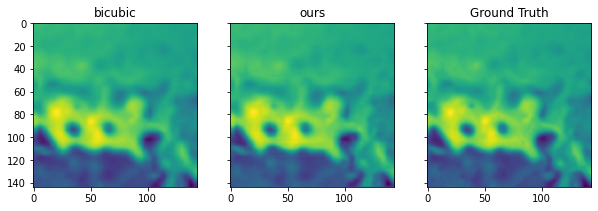

PSNR of Bicubic and Ground Truth image is  34.16422086424605
PSNR of DIPCI and Ground Truth is  32.12164714666808


<Figure size 432x288 with 0 Axes>

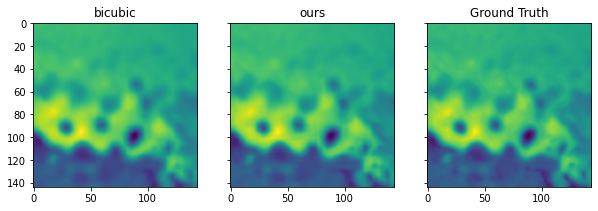

PSNR of Bicubic and Ground Truth image is  33.50176760356882
PSNR of DIPCI and Ground Truth is  32.87634778858372


<Figure size 432x288 with 0 Axes>

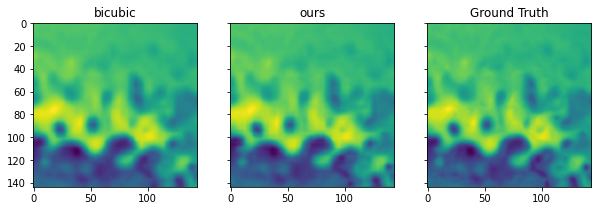

PSNR of Bicubic and Ground Truth image is  32.04913477720635
PSNR of DIPCI and Ground Truth is  33.136944683768604


In [7]:
test_dipci(dipci, ssh_lr[:366], sst_lr[:366], ssh[:366])